MovieWriter ffmpeg unavailable; using Pillow instead.


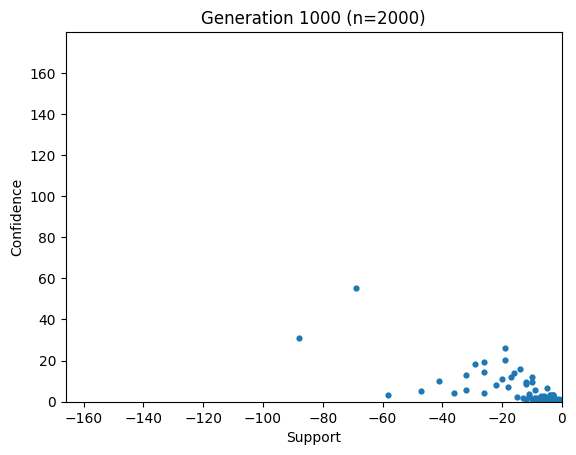

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# --- Load & prepare ---
df = pd.read_csv(
    "../experiments/results.csv",
    header=None,
    names=["generation", "individual", "support", "confidence"]
)

# Negate support for plotting (copy to avoid SettingWithCopyWarning)
df_plot = df.copy()
#df_plot.loc[:, "support"] *= -1

gens = np.sort(df_plot["generation"].unique())

# Fix axes across frames for a stable animation
x_min, x_max = df_plot["support"].min(), df_plot["support"].max()
y_min, y_max = df_plot["confidence"].min(), df_plot["confidence"].max()

# --- Figure & artists ---
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=12)  # small points; adjust as you like
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
title = ax.set_title("")

def init():
    # Empty the scatter
    scat.set_offsets(np.empty((0, 2)))
    title.set_text("")
    return scat, title

def animate(i):
    g = gens[i]
    d = df_plot[df_plot["generation"] == g]
    # Update point positions
    xy = np.column_stack([d["support"].to_numpy(), d["confidence"].to_numpy()])
    scat.set_offsets(xy)
    title.set_text(f"Generation {g} (n={len(d)})")
    return scat, title

ani = FuncAnimation(
    fig, animate, frames=len(gens), init_func=init,
    interval=0.05, blit=False, repeat=True
)

ani.save("ParetoFront.gif")
plt.show()


In [52]:
interest = df_plot[df_plot['generation'] > 999][df_plot['support'] < 0] 

/var/folders/s0/hmlp5rbd1jq4_4kj2zmc89g80000gn/T/ipykernel_24345/575856886.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  interest = df_plot[df_plot['generation'] > 999][df_plot['support'] < 0]


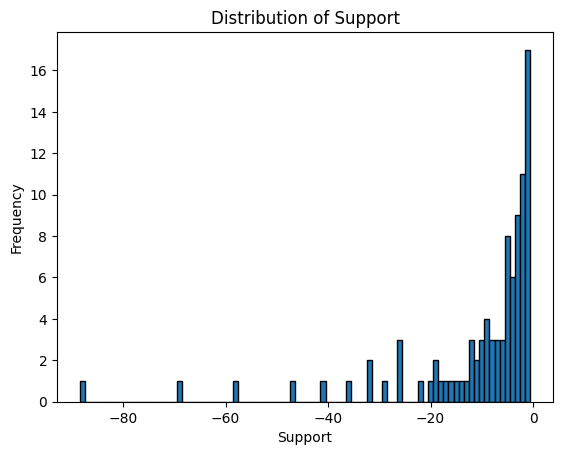

,generation,individual,support,confidence
1998002,1000,2,-88,30.965160
1998003,1000,3,-9,5.510094
1998004,1000,4,-58,3.461258
1998005,1000,5,-8,1.965097
1998007,1000,7,-5,0.102590
...,...,...,...,...
1998996,1000,996,-4,3.043942
1999003,1000,1003,-41,10.020780
1999143,1000,1143,-2,0.128433
1999625,1000,1625,-2,0.337793


In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Example discrete support values
support = interest['support']  # integers 0–9

plt.hist(support, bins=np.arange(support.min(), support.max() + 2) - 0.5,
         edgecolor='black')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.title('Distribution of Support')
plt.show()

interest
